In [1]:
# surpress warnings:
def warn(*args,**kwargs):
    pass 
import warnings 
warnings.warn = warn

In [2]:
import sys
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree 

In [3]:
my_data = pd.read_csv('https://github.com/sophalITC/datasci/raw/master/drug200.csv')
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


The given data appears to be a dataset with various features and corresponding labels for drug classification. Let's analyze the features:

- ```Age```: The age of the patient. It represents the numerical value indicating the age of the individual.

- ```Sex```: The gender of the patient. It is represented by the letter "M" for male and "F" for female.

- ```BP```: Blood pressure level of the patient. It can take on different categories such as "HIGH," "LOW," or "NORMAL," indicating the patient's blood pressure classification.

- ```Cholesterol```: The cholesterol level of the patient. It can have different categories such as "HIGH" or "NORMAL," indicating the patient's cholesterol classification.

- ```Na_to_K```: The sodium-to-potassium ratio in the patient's blood. It represents a numerical value that indicates the ratio between sodium and potassium ions.

These features are used to predict the corresponding label:

- ```Drug```: The type of drug prescribed for the patient. It can take on different categories, such as "drugY," "drugX," and "drugC," representing different medications prescribed based on the patient's characteristics.

The given dataset seems to contain information about patients' age, sex, blood pressure, cholesterol level, sodium-to-potassium ratio, and the drug prescribed. These features can be used to train a classification model to predict the appropriate drug for a patient based on their characteristics.

In [4]:
# write your code here 
my_data.shape

(200, 6)

In [5]:
x = my_data[['Age','Sex','BP','Cholesterol','Na_to_K']].values
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

### <Font color = green|><b>Encode Categories features

In [6]:
from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
x[:,1] = le_sex.transform(x[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
x[:,2] = le_BP.transform(x[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL','HIGH'])
x[:,3] = le_Chol.transform(x[:,3])
x[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [7]:
y = my_data['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

### <font color = green|><b>Split data into train and test sets respectively

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

In [9]:
# write your code here 
x_train.shape

(140, 5)

In [10]:
y_train.shape

(140,)

In [11]:
x_test.shape

(60, 5)

In [37]:
y_test.shape

(60,)

### <font color = green|><b>Apply model decission tree

In [38]:
drugTree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
drugTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [40]:
predTree = drugTree.predict(x_test)

In [41]:
print(predTree[0:5])
print(y_test[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [42]:
from sklearn import metrics 
print("DecissionTree's Acurracy",metrics.accuracy_score(y_test,predTree))

DecissionTree's Acurracy 0.9833333333333333


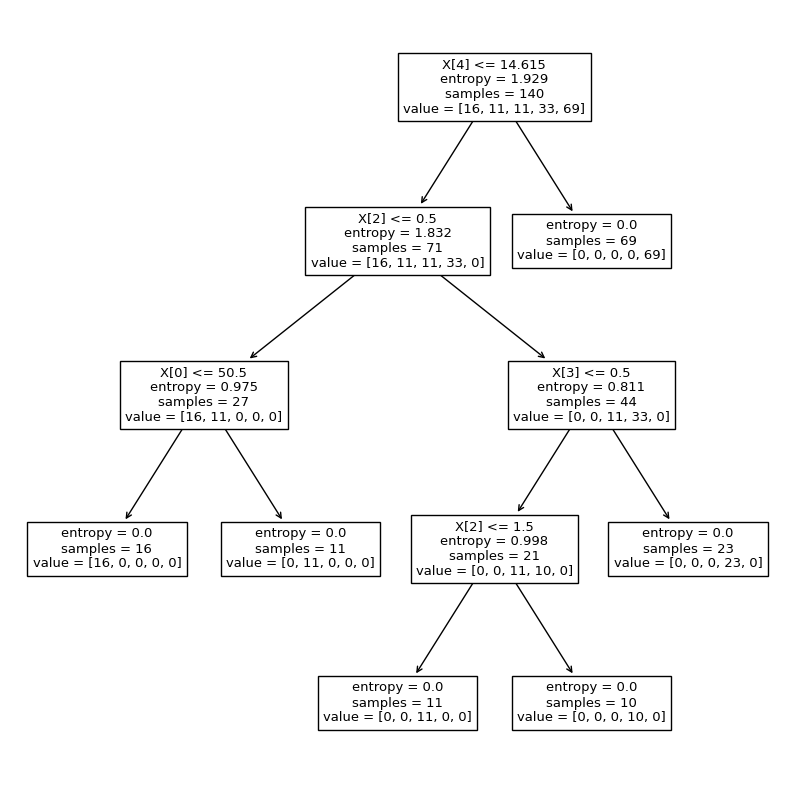

In [43]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,10))
tree.plot_tree(drugTree)
plt.show()

## <font color = green|><b><p style = 'text-align:center'>The End